In [ ]:
import numpy as np 
import pandas as pd 
import os
import scipy.stats as ss
from collections import Counter
import math 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# removes Gridlines
sns.set(style="ticks")


In [ ]:
##Importing files from the computer when using google colab
from google.colab import files
uploaded = files.upload()

Saving FIFA2019.csv to FIFA2019.csv


In [ ]:
#https://github.com/4m4n5/fifa18-all-player-statistics
data = pd.read_csv("FIFA2019.csv") #load the dataset

In [ ]:
##############################Data pre-processing##############################

In [ ]:
#numeric and categorical features

numeric= ['Overall', 'Crossing','Finishing',  'ShortPassing',  'Dribbling','LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility',  'Stamina','Volleys','FKAccuracy','Reactions','Balance','ShotPower','Strength','LongShots','Aggression','Interceptions']
categorical= ['Preferred Foot','Position','Body Type','Nationality','Weak Foot']

In [ ]:
data = data[numeric+categorical] #add numeric and categorical features to the dataframe

In [ ]:
#Convert categorical variable into dummy/indicator variables using pd.get_dummies

train_data = pd.concat([data[numeric], pd.get_dummies(data[categorical])],axis=1)
features = train_data.columns #save the column names in features

train_data = train_data.dropna() #Remove missing values

In [ ]:
train_data = pd.DataFrame(train_data,columns=features) #convert train_data to dataframe

In [ ]:
y = train_data['Overall']>=87 #select labels where overall rating is>=87
X = train_data.copy()
del X['Overall'] #drop the overall column
X.head()

,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,...,Nationality_Uganda,Nationality_Ukraine,Nationality_United Arab Emirates,Nationality_United States,Nationality_Uruguay,Nationality_Uzbekistan,Nationality_Venezuela,Nationality_Wales,Nationality_Zambia,Nationality_Zimbabwe
0,84.0,95.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,...,0,0,0,0,0,0,0,0,0,0
1,84.0,94.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,87.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,...,0,0,0,0,0,0,0,0,0,0
3,17.0,13.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,...,0,0,0,0,0,0,0,0,0,0
4,93.0,82.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
########################Feature selection using RFE################################

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

num_features=15

X_norm = MinMaxScaler().fit_transform(X)#normalize using min-max scaler

rfe_sel = RFE(estimator=LogisticRegression(), n_features_to_select=num_features, step=10, verbose=5)
best=rfe_sel.fit(X_norm, y)

Fitting estimator with 223 features.
Fitting estimator with 213 features.
Fitting estimator with 203 features.
Fitting estimator with 193 features.
Fitting estimator with 183 features.
Fitting estimator with 173 features.
Fitting estimator with 163 features.
Fitting estimator with 153 features.
Fitting estimator with 143 features.
Fitting estimator with 133 features.
Fitting estimator with 123 features.
Fitting estimator with 113 features.
Fitting estimator with 103 features.
Fitting estimator with 93 features.
Fitting estimator with 83 features.
Fitting estimator with 73 features.
Fitting estimator with 63 features.
Fitting estimator with 53 features.
Fitting estimator with 43 features.
Fitting estimator with 33 features.
Fitting estimator with 23 features.


In [ ]:
scores = pd.DataFrame(best.ranking_)
data_col = pd.DataFrame(X.columns)

#concat two dataframes 
featureScores = pd.concat([data_col,scores],axis=1)
featureScores.columns = ['Feature_Names','Score']  #naming the dataframe columns
print(featureScores.nlargest(num_features,'Score'))  #print 15 best features

               Feature_Names  Score
62       Nationality_Andorra     22
73        Nationality_Belize     22
78      Nationality_Botswana     22
121      Nationality_Grenada     22
133    Nationality_Indonesia     22
157        Nationality_Malta     22
183  Nationality_Puerto Rico     22
184        Nationality_Qatar     22
197  Nationality_South Sudan     22
200     Nationality_St Lucia     22
49       Body Type_Akinfenwa     21
59   Nationality_Afghanistan     21
109     Nationality_Ethiopia     21
122         Nationality_Guam     21
129    Nationality_Hong Kong     21


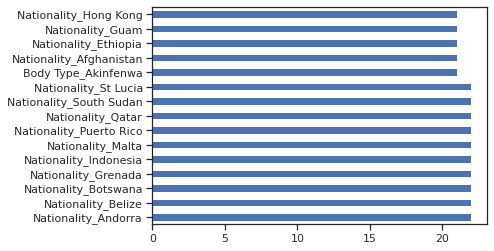

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(best.ranking_, index=X.columns)
feat_importances.nlargest(num_features).plot(kind='barh')
plt.show()